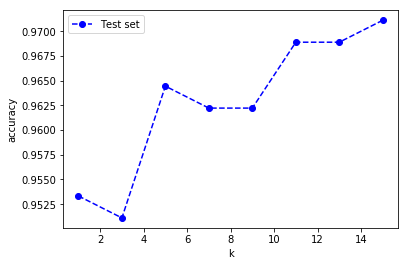

In [1]:
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

# global
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create model
result = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
    result.append(acc/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result, 'ob--', label = 'Test set')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()

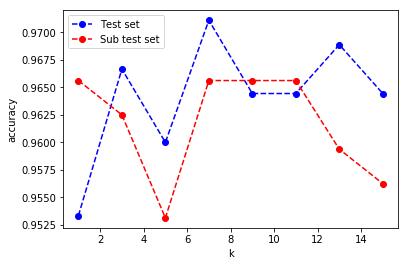

In [2]:
# perameters
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create model
result, result_subset = [], []
for k in range(1, MAX_K+1, 2):
    acc, acc_subset = 0, 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
        # spilt subset data randomly
        X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train, y_train, test_size = 0.3,
                                                                            random_state=seed[i])
        knn.fit(X_sub_train, y_sub_train)
        y_sub_pred = knn.predict(X_sub_test)
        acc_subset+=metrics.accuracy_score(y_sub_test, y_sub_pred)
    result.append(acc/10)
    result_subset.append(acc_subset/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result, 'ob--', label = 'Test set')
plt.plot(range(1, MAX_K+1, 2), result_subset, 'or--', label = 'Sub test set')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()

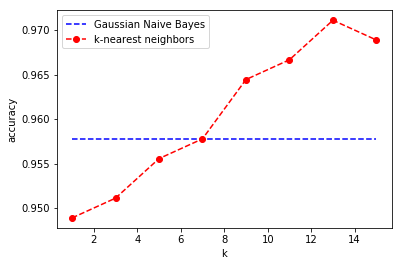

In [3]:
from sklearn.naive_bayes import GaussianNB

# global
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create Gaussian Naive Bayes model
acc = 0
for i in range(10):
    # spilt data randomly
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                        random_state=seed[i])
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc+=metrics.accuracy_score(y_test, y_pred)
result_gnb = acc/10

# create model
result_knn = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
    result_knn.append(acc/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), [result_gnb for i in range(1, MAX_K+1, 2)], 'b--', label = 'Gaussian Naive Bayes')
plt.plot(range(1, MAX_K+1, 2), result_knn, 'or--', label = 'k-nearest neighbors')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()